### make_blobs를 사용한 분류학습용 데이터 생성

In [292]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [255]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)  # centers=3 3개의 그룹으로 분류하라는 의미

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
X[:6],y[:6]

(array([[-0.80723584,  2.66946295],
        [ 1.9263585 ,  4.15243012],
        [-1.50016563,  3.10133251],
        [-1.10905031,  2.87786354],
        [-2.53122673,  1.91969053],
        [ 1.26659827,  1.99230203]]),
 array([2, 0, 2, 2, 2, 1]))

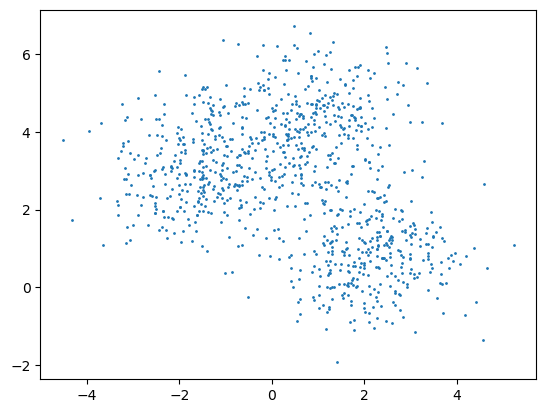

In [6]:
plt.scatter(X[:,0],X[:,1], s=1,)
plt.show()

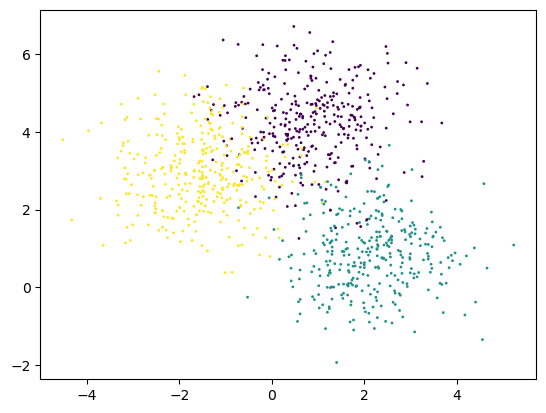

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,s=1)
plt.show()

In [9]:
col = {0:'r',1:'g',2:'b'}
color = [col[c] for c in y]
color[:5]

['b', 'r', 'b', 'b', 'b']

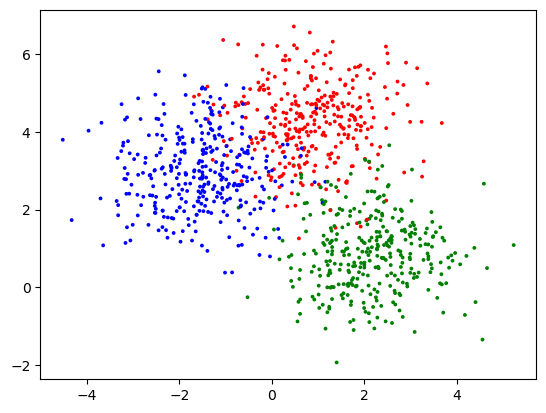

In [10]:
plt.scatter(X[:,0],X[:,1], c=color, s=3)
plt.show()

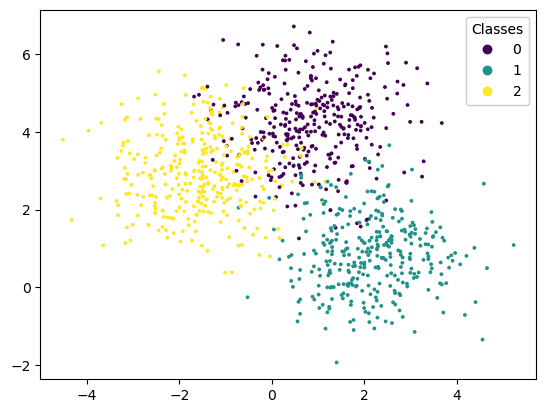

In [12]:
fig, ax = plt.subplots()

scatter = ax.scatter(X[:,0],X[:,1],c=y,s=3)

legend1 = ax.legend(*scatter.legend_elements(),
                   loc="upper right",title="Classes")
ax.add_artist(legend1)
plt.show()

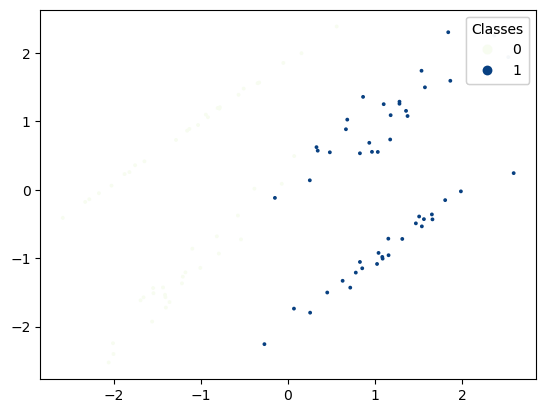

In [17]:
fig, ax = plt.subplots()

scatter = ax.scatter(X[:,0],X[:,1],c=y,s=3,cmap='GnBu')

legend1 = ax.legend(*scatter.legend_elements(),
                   loc="upper right",title="Classes")
ax.add_artist(legend1)
plt.show()

## LogisticRegression(클래스 이름) 을 이용한 분류 
- 데이터셋을 학습용, 검증용으로 분리
- LogisticRegression 모델 생성
- from sklearn.linear_model import LogisticRegression
- model = LogisticRegression(max_iter=5000) -> 이렇게 해야지 에러가 안남
- 생성된 모델 학습( logisticRegr.fit(문제, 정답) )
- 검증 : score, predict 
- 분류 결과를 시각화 확인

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 2), (250, 2), (750,), (250,))

In [241]:
model = LogisticRegression()
model

LogisticRegression()

In [242]:
model.fit(X_train, y_train)

LogisticRegression()

In [243]:
model.coef_ , model.intercept_

(array([[0.62350007, 0.34970804, 3.1268465 ]]), array([-0.47244386]))

In [244]:
model.score(X_train, y_train)

0.9288888888888889

In [245]:
pred = model.predict(X_test)

In [246]:
col = {0:'r',1:'p',2:'g'}
color = [col[c] for c in y]
color[:5]

['p', 'p', 'p', 'r', 'r']

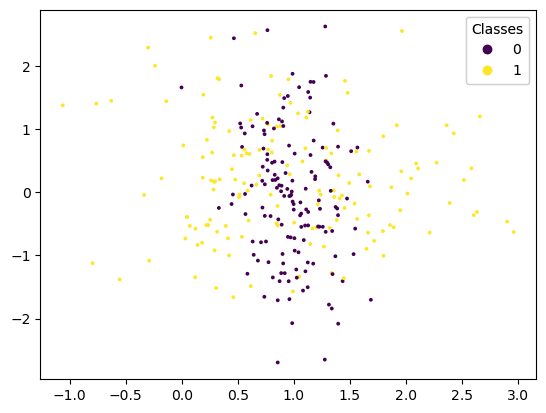

In [247]:
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0],X[:,1],c=y,s=3)

legend1 = ax.legend(*scatter.legend_elements(),
                   loc="upper right",title="Classes")
ax.add_artist(legend1)
plt.show()

In [248]:
model.predict([[1,2]]) , model.predict([[2,3]]) , model.predict([[0,2]]) 

ValueError: X has 2 features, but LogisticRegression is expecting 3 features as input.

In [249]:
# 학습된 모델에 전체 데이터를 전달하여 그 분류 결과를 산점도로 시각화해보세요 

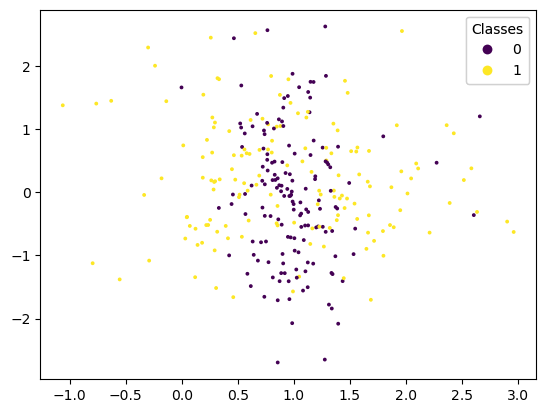

In [250]:
pred = model.predict(X)
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0],X[:,1],c=pred,s=3)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right",title="Classes")
ax.add_artist(legend1)
plt.show()

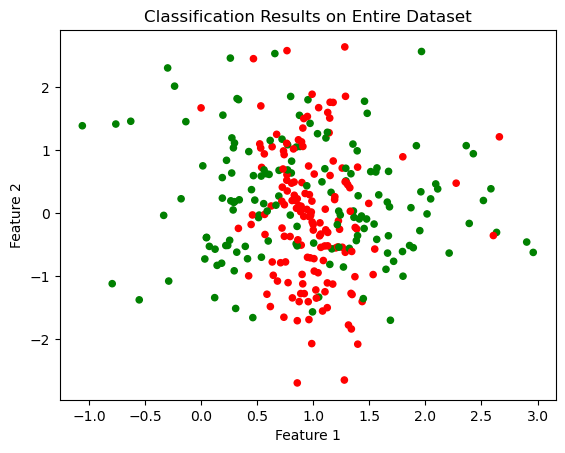

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터셋 생성
X, y = make_classification(n_samples=300, n_features=3, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 데이터를 학습용과 검증용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# LogisticRegression 모델 생성
model = LogisticRegression()

# 모델 학습
model.fit(X_train, y_train)

# 전체 데이터셋에 대한 예측
all_predictions = model.predict(X)

# 산점도 시각화
colormap = np.array(['r', 'g','b'])  # 이진 클래스에 맞게 colormap 수정
plt.scatter(X[:, 0], X[:, 1], c=colormap[all_predictions], s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Results on Entire Dataset')
plt.show()


C:\Users\201-05\AppData\Local\Temp\ipykernel_18260\3648073320.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10', len(unique_classes))  # 다양한 색깔을 가지는 colormap 사용


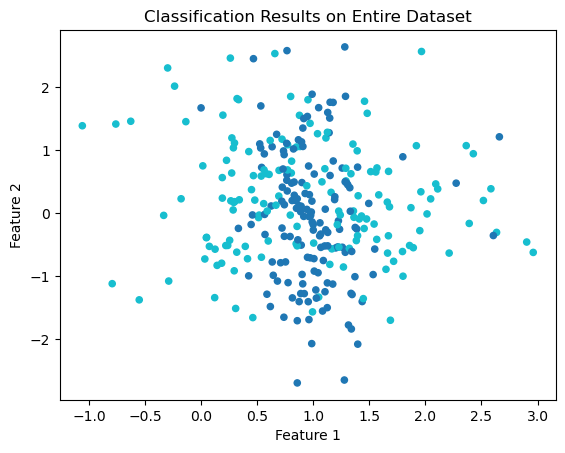

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터셋 생성
X, y = make_classification(n_samples=300, n_features=3, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 데이터를 학습용과 검증용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# LogisticRegression 모델 생성
model = LogisticRegression()

# 모델 학습
model.fit(X_train, y_train)

# 전체 데이터셋에 대한 예측
all_predictions = model.predict(X)

# 산점도 시각화
unique_classes = np.unique(all_predictions)
colormap = plt.cm.get_cmap('tab10', len(unique_classes))  # 다양한 색깔을 가지는 colormap 사용

plt.scatter(X[:, 0], X[:, 1], c=colormap(all_predictions), s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Results on Entire Dataset')
plt.show()


In [188]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터셋 생성
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 데이터를 학습용과 검증용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# LogisticRegression 모델 생성
model = LogisticRegression()

# 모델 학습
model.fit(X_train, y_train)

# 전체 데이터셋에 대한 예측
all_predictions = model.predict(X)

# 산점도 시각화
plt.scatter(X[:, 0], X[:, 1], c=colormap[all_predictions], s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Results on Entire Dataset')
plt.show()


TypeError: 'ListedColormap' object is not subscriptable

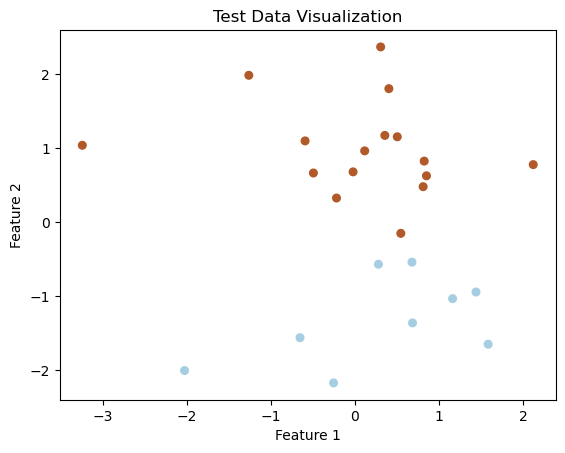

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터셋 생성
X, y = make_classification(n_samples=100, n_features=3, n_informative=2, n_redundant=0, n_repeated=0, random_state=42)

# 데이터를 학습용과 검증용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# LogisticRegression 모델 생성
model = LogisticRegression()

# 모델 학습
model.fit(X_train, y_train)

# 시각화
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=30, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data Visualization')
plt.show()


In [109]:
model.classes_

array([0, 1, 2])

In [125]:
model.intercept_

array([-3.56273058,  2.73609724,  0.82663334])

In [126]:
model.coef_

array([[ 0.70489993,  1.48078564],
       [ 1.46011012, -1.42849441],
       [-2.16501006, -0.05229123]])

In [258]:
x1 = np.random.uniform(low=X[:,0].min(), high=X[:,0].max(), size=10000)
x2 = np.random.uniform(low=X[:,0].min(), high=X[:,0].max(), size=10000)
arr = np.append(x1.reshape(-1,1), x2.reshape(-1,1),axis=1)
arr.shape

(10000, 2)

In [259]:
pred = model.predict(arr)
fig, ax = plt.subplots()
scatter = ax.scatter(arr[:,0], arr[:,1],s=3,c=pred)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right",title="Classes")
ax.add_artist(legend1)
plt.show()

ValueError: X has 2 features, but LogisticRegression is expecting 3 features as input.

In [12]:
import pandas as pd
df = pd.read_csv('winequality-red.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
df.value_counts('quality').sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [3]:
import pandas as pd

# 데이터프레임 생성
data = {'quality': [10, 53, 681, 638, 199, 18]}
df = pd.DataFrame(data)

# 값의 범위를 0부터 5로 변환하는 함수
def map_to_new_range(value):
    if 0 <= value <= 5:
        old_min = df['quality'].min()
        old_max = df['quality'].max()
        new_min = 0
        new_max = 5
        new_value = ((value - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min
        return int(new_value)
    return value

# 'quality' 열의 값을 변환
df['quality'] = df['quality'].apply(map_to_new_range)

# 변환된 데이터프레임 출력
print(df)


   quality
0       10
1       53
2      681
3      638
4      199
5       18


In [283]:
df2.isnull().sum()

quality    0
dtype: int64

In [14]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
# LogisticRegression을 사용한 다중분류 시스템 작성 (알코올과 등급을 차트로 그리기)

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [64]:
import pandas as pd
df = pd.read_csv('winequality-red.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [77]:
# 학습용과 검증용 데이터로 분리
X, y = make_blobs(n_samples=1599, centers=5, n_features=12, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.shape, y.shape

((1599, 12), (1599,))

In [78]:
model = LogisticRegression()
model

LogisticRegression()

In [79]:
# 모델 학습
model.fit(X_train, y_train)

LogisticRegression()

In [80]:
model.coef_ 

array([[ 0.08850046,  0.02536973,  0.21645054,  0.12804251,  0.01908083,
         0.10688758, -0.09238727,  0.29530632,  0.1657069 , -0.19114121,
         0.3616168 ,  0.00274391],
       [ 0.0532319 ,  0.1183808 , -0.24159098, -0.27376993, -0.21714123,
         0.12923672,  0.18430022,  0.03245069,  0.06552255,  0.1891242 ,
        -0.07681079,  0.14085034],
       [-0.17583439,  0.00531401, -0.19181978,  0.23024355,  0.00565335,
        -0.02977542, -0.09692616,  0.12021223, -0.17302965,  0.04896913,
        -0.23934433,  0.0953223 ],
       [ 0.11456934,  0.02168236,  0.2414175 ,  0.07677641, -0.13813308,
         0.02044841,  0.17993149, -0.25488907, -0.03878961,  0.13708796,
        -0.13959976, -0.16059821],
       [-0.08046731, -0.1707469 , -0.02445728, -0.16129254,  0.33054013,
        -0.2267973 , -0.17491828, -0.19308018, -0.01941019, -0.18404009,
         0.09413808, -0.07831835]])

In [81]:
# 검증용 데이터에 대한 예측
model.predict(X_test)

array([1, 4, 0, 4, 3, 1, 1, 2, 4, 3, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 1,
       3, 1, 3, 0, 2, 1, 4, 3, 0, 1, 0, 4, 2, 3, 0, 2, 0, 3, 2, 3, 3, 0,
       0, 4, 1, 2, 1, 0, 3, 2, 0, 1, 1, 4, 3, 0, 4, 3, 3, 2, 2, 4, 2, 1,
       2, 3, 1, 4, 3, 3, 2, 4, 1, 4, 0, 2, 0, 3, 4, 4, 3, 1, 0, 2, 4, 2,
       1, 2, 2, 4, 4, 1, 4, 3, 3, 1, 2, 0, 3, 3, 4, 2, 4, 0, 2, 2, 0, 2,
       2, 4, 1, 0, 2, 2, 3, 4, 0, 3, 3, 0, 3, 3, 0, 1, 3, 0, 2, 4, 0, 3,
       0, 3, 3, 1, 0, 1, 3, 1, 0, 0, 3, 3, 2, 3, 0, 2, 0, 4, 3, 1, 1, 2,
       3, 4, 4, 2, 0, 3, 0, 3, 3, 2, 3, 0, 3, 0, 3, 1, 1, 1, 2, 3, 4, 2,
       1, 4, 4, 4, 1, 0, 4, 2, 4, 3, 1, 0, 1, 4, 1, 2, 3, 2, 4, 0, 2, 1,
       2, 1, 3, 2, 0, 2, 4, 3, 0, 2, 0, 4, 2, 3, 1, 0, 0, 4, 3, 0, 2, 4,
       3, 1, 4, 3, 2, 4, 1, 3, 2, 4, 1, 0, 0, 2, 1, 2, 3, 4, 0, 2, 1, 1,
       4, 2, 4, 1, 2, 1, 2, 3, 4, 3, 3, 0, 3, 3, 1, 1, 2, 3, 2, 4, 4, 3,
       1, 3, 4, 4, 2, 2, 4, 0, 2, 2, 4, 0, 3, 3, 1, 1, 2, 0, 4, 4, 1, 0,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 3, 3, 2, 2, 4,

In [89]:
corr_mat = df.corr()
corr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


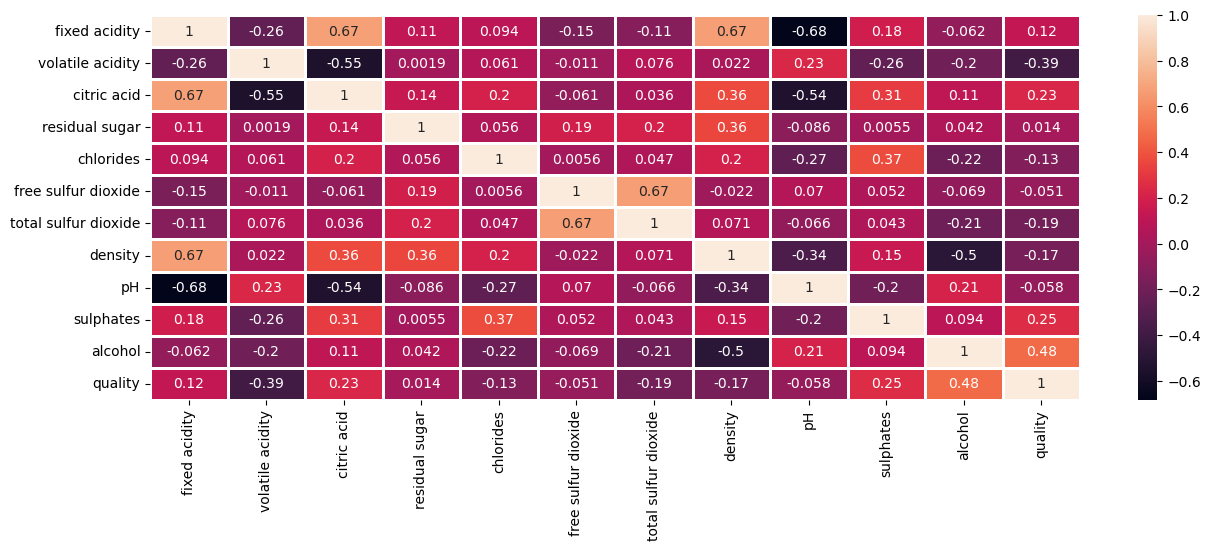

In [90]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(corr_mat,annot=True,linewidth=2)
plt.show()

In [91]:
y = df['quality'].values
y.shape

(1599,)

In [92]:
X = df.drop('quality',axis=1).values
X.shape

(1599, 11)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape

((1279, 11), (1279,))

In [94]:
model = LogisticRegression(max_iter=10000)
model

LogisticRegression(max_iter=10000)

In [95]:
model.fit(X_train,y_train)  # 데이터의 계수를 맞추는 일

LogisticRegression(max_iter=10000)

In [96]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.5926505082095387, 0.625)

In [97]:
pred = model.predict(X_test)

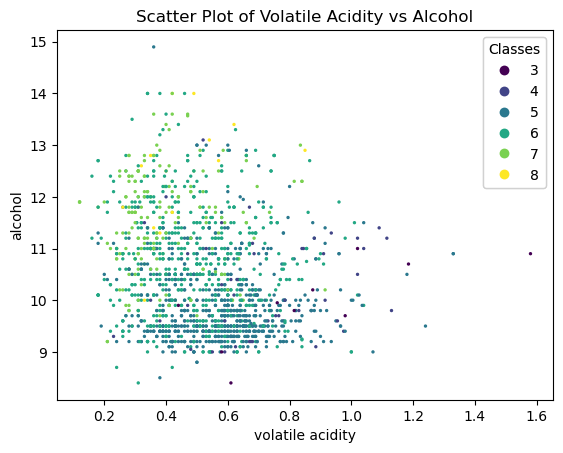

In [83]:
fig, ax = plt.subplots()
scatter = ax.scatter(df['volatile acidity'], df['alcohol'], c=df['quality'], s=2)  # 수정된 부분: c=df['quality']
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.add_artist(legend1)

plt.xlabel('volatile acidity')
plt.ylabel('alcohol')
plt.title('Scatter Plot of Volatile Acidity vs Alcohol')
plt.show()


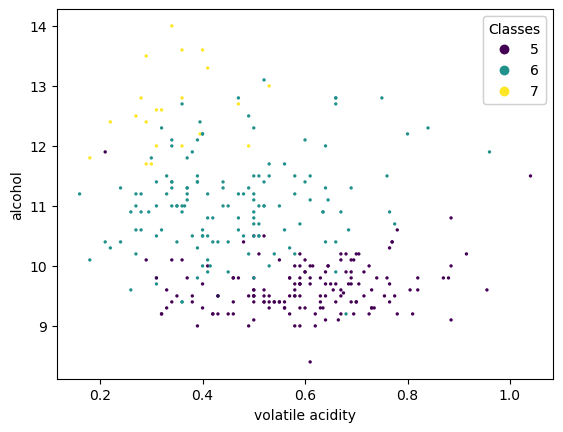

In [98]:
fig, ax = plt.subplots()
scatter = ax.scatter(X_test[:,1], X_test[:,10],c=pred, s=2)  # 수정된 부분: c=df['quality']
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.add_artist(legend1)

plt.xlabel('volatile acidity')
plt.ylabel('alcohol')
plt.show()

In [110]:
import pandas as pd
df_bank = pd.read_csv('https://cwisky.github.io/public/bank.csv',sep=';')
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [111]:
df_bank2 = pd.get_dummies(df_bank)
df_bank2

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,59,0,5,226,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4519,28,1137,6,129,4,211,3,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [113]:
corr_bank = df_bank2.corr()
corr_bank

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,-0.048385,-0.049307,0.015638,...,-0.119784,0.027659,0.081766,-0.015074,0.012693,-0.026179,0.048626,-0.017414,-0.045092,0.045092
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,-0.022386,-0.057691,0.014523,...,-0.070809,0.120363,0.058694,0.005975,0.025719,0.000129,0.029999,-0.033843,-0.017905,0.017905
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,0.017052,-0.027025,-0.015707,...,-0.028992,0.095832,0.040235,-0.043666,-0.064235,-0.021062,-0.027720,0.075100,0.011244,-0.011244
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,-0.038763,0.028114,0.016267,...,0.008639,0.009572,0.004566,-0.020023,-0.012852,0.008109,0.049255,-0.015239,-0.401118,0.401118
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.017895,0.008783,-0.012910,...,-0.076263,-0.083385,-0.058536,-0.040207,-0.094021,-0.030435,-0.058268,0.117375,0.061147,-0.061147
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.035127,0.009374,-0.014704,...,0.090216,0.012549,0.059521,0.047890,0.708380,0.382970,0.212188,-0.867713,-0.104087,0.104087
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.020665,-0.014861,-0.013226,...,0.027549,0.055400,0.088764,0.059763,0.475289,0.358382,0.250277,-0.682746,-0.116714,0.116714
job_admin.,-0.048385,-0.022386,0.017052,-0.038763,-0.017895,0.035127,0.020665,1.000000,-0.176876,-0.067550,...,0.012749,0.004801,0.030236,0.003387,0.016644,0.018222,0.040445,-0.040635,-0.006568,0.006568
job_blue-collar,-0.049307,-0.057691,-0.027025,0.028114,0.008783,0.009374,-0.014861,-0.176876,1.000000,-0.101057,...,0.165276,-0.060881,-0.044295,-0.024890,-0.002677,-0.011244,-0.042435,0.026502,0.068147,-0.068147
job_entrepreneur,0.015638,0.014523,-0.015707,0.016267,-0.012910,-0.014704,-0.013226,-0.067550,-0.101057,1.000000,...,0.000128,0.073161,-0.017498,0.000742,-0.012069,-0.001836,-0.026645,0.022264,0.015968,-0.015968


In [ ]:
import seaborn as sns
plt.figure(figsize=(15,11))
sns.heatmap(df_bank,annot=True)
plt.show()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
